# **Starting Set-up**

In [ ]:
# Install Required Libs
#======================
!pip install transformers
!pip install PyDrive
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 48.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import Required Packages
#=========================

# General Purpose Packages
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

# Transformers Model & Tokenizer
from transformers import BertTokenizer, TFBertForSequenceClassification

# Transformers Function for Create Input Example & Input Feature
from transformers import InputExample, InputFeatures

# Keras
import tensorflow as tf
from tensorflow import keras

# Model Evaluation Metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [ ]:
# Define Model & Tokenizer
#=========================
model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased",  
                                                        from_pt = True,
                                                        num_labels = 3)       # Set jumlah kelas / label yang akan diprediksi model
                                                        
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Get Model Information
#======================
model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  2307      
                                                                 
Total params: 109,484,547
Trainable params: 109,484,547
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Connect to G-Drive
#===================
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# **Data Pre-processing**

## Basic Pre-process

In [ ]:
# Define URLs for Data from G-Drive
#==================================
proj_path = '/content/gdrive/MyDrive/content/'

# Set Data Into Datafram
#=======================
df = pd.read_csv(proj_path + 'Tweets.csv')
df = df.dropna()

# Get Data Info
#==============
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27480 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27480 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27480 non-null  object
dtypes: object(4)
memory usage: 1.0+ MB


In [ ]:
print(df.shape)

(27480, 4)


In [ ]:
# Test Call
#==========
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [ ]:
# Change Column Name
#===================
df.rename(columns = {'selected_text':'DATA_COLUMN'}, inplace = True)
df.rename(columns = {'sentiment':'LABEL_COLUMN'}, inplace = True)

In [ ]:
# Convert Label Into Numeric
#===========================
datalabel = {'neutral':0, 'negative':1, 'positive':2}
df.LABEL_COLUMN =[datalabel[item] for  item in df.LABEL_COLUMN]

# Test Call
#==========
df.head()

,textID,text,DATA_COLUMN,LABEL_COLUMN
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,1
2,088c60f138,my boss is bullying me...,bullying me,1
3,9642c003ef,what interview! leave me alone,leave me alone,1
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",1


In [ ]:
# Remove UN-USED COLUMN
#======================
df.drop(['textID', 'text'], axis = 1, inplace = True)

# Test Call
#==========
df.head()

,DATA_COLUMN,LABEL_COLUMN
0,"I`d have responded, if I were going",0
1,Sooo SAD,1
2,bullying me,1
3,leave me alone,1
4,"Sons of ****,",1


## Extract & Splitting Data

In [ ]:
# Reset Index
#============
df.reset_index(drop=True, inplace=True)
df.dropna(inplace=True)
# Test Call
#==========
df

,DATA_COLUMN,LABEL_COLUMN
0,"I`d have responded, if I were going",0
1,Sooo SAD,1
2,bullying me,1
3,leave me alone,1
4,"Sons of ****,",1
...,...,...
27475,d lost,1
27476,", don`t force",1
27477,Yay good for both of you.,2
27478,But it was worth it ****.,2


In [ ]:
# Extract Only Required Rows for Research
#========================================
df_new = df.sample(10000)

df_new.reset_index(drop=True, inplace=True)
# Test Call
#==========

df_new

,DATA_COLUMN,LABEL_COLUMN
0,my back and legs kill,1
1,ah what a lovely day for a bike ride and cake ...,2
2,love my family and sorors,2
3,"haircut as short as possible, even change colo...",0
4,is new to twitter.... needs some studying here,0
...,...,...
9995,"- Bless you as well sweetie, and i hope you ha...",2
9996,It`s not the internal fuse either Poop. Might...,0
9997,hilarious..,2
9998,All is good,2


In [ ]:
# Create Train Data
#==================
df_train = df_new.sample(frac = 0.65)
df_train.reset_index(drop=True, inplace=True)
# Test Call
#==========
df_train

,DATA_COLUMN,LABEL_COLUMN
0,"Right folks, really must go now; have to babys...",0
1,Happy birthday.,2
2,your not following us,1
3,cant wait to see,2
4,Enjoyed see`n everyone last night! even tho it...,0
...,...,...
6495,! dummyhead.,1
6496,Oh God bless you,2
6497,"Bye. Tekzilla, then revision.",0
6498,aww poor precious,1


In [ ]:
# Set Temporary Dataframe
#========================
df_temporary = df_new.drop(df_train.index)
df_temporary.reset_index(drop=True, inplace=True)
# Test Call
#==========
df_temporary

,DATA_COLUMN,LABEL_COLUMN
0,"Unfortunatley,",1
1,Apologies in advance.,1
2,Your cave? Does it have an espresso machine?,0
3,Thanks,2
4,I am in so much pain I really don`t feel too g...,1
...,...,...
3495,"- Bless you as well sweetie, and i hope you ha...",2
3496,It`s not the internal fuse either Poop. Might...,0
3497,hilarious..,2
3498,All is good,2


In [ ]:
# Create Validation Data
#=======================
df_valid = df_temporary.sample(frac = 0.65)
df_valid.reset_index(drop=True, inplace=True)
# Test Call
#==========
df_valid

,DATA_COLUMN,LABEL_COLUMN
0,laughs!,2
1,I already know what happens on Supernatural.,0
2,recession.,1
3,#yourock,2
4,fave,2
...,...,...
2270,", Just read an article that buying IP`s doesn`...",0
2271,getting ready for my first day at my new job,0
2272,. Well gotdamn girl!!! I dont know what else!!...,0
2273,2 more days till half term is over,0


In [ ]:
# Create Test Data
#=================
df_test = df_temporary.drop(df_valid.index)
df_test.reset_index(drop=True, inplace=True)
# Test Call
#==========
df_test

,DATA_COLUMN,LABEL_COLUMN
0,pretty much ever HP except the one i wanted to...,2
1,broke,1
2,Did you get your free chocolate?!? I still hav...,0
3,thats funny..,1
4,Dont worry man.,2
...,...,...
1220,"- Bless you as well sweetie, and i hope you ha...",2
1221,It`s not the internal fuse either Poop. Might...,0
1222,hilarious..,2
1223,All is good,2


## Create Function To Convert Data Into Input Example & Features

In [ ]:
# Function For Convert Data Into Input Example
#=============================================
def convert_data_to_examples(df_train, df_valid, df_test, DATA_COLUMN, LABEL_COLUMN): 
  train_InputExamples = df_train.apply(lambda x: InputExample(guid   = None,                       # Globally unique ID for bookkeeping, unused in this case
                                                           text_a = x[DATA_COLUMN], 
                                                           text_b = None,
                                                           label  = x[LABEL_COLUMN]),axis = 1)

  validation_InputExamples = df_valid.apply(lambda x: InputExample(guid   = None,                  # Globally unique ID for bookkeeping, unused in this case
                                                                text_a = x[DATA_COLUMN], 
                                                                text_b = None,
                                                                label  = x[LABEL_COLUMN]), axis = 1)
  
  test_InputExamples = df_test.apply(lambda x: InputExample(guid   = None,                         # Globally unique ID for bookkeeping, unused in this case
                                                         text_a = x[DATA_COLUMN], 
                                                         text_b = None,
                                                         label  = x[LABEL_COLUMN]), axis = 1)
  
  return train_InputExamples, validation_InputExamples, test_InputExamples


# Function For Convert Input Example Into TF Dataset
#===================================================
def convert_examples_to_tf_dataset(examples, tokenizer, max_length=128):
    features = [] # -> will hold InputFeatures to be converted later

    for e in examples:
        # Documentation is really strong for this method, so please take a look at it
        input_dict = tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,
            max_length=max_length,
            truncation=True,
            return_attention_mask=True,
            return_token_type_ids=True,
            padding='max_length',
            verbose=False
        )

        input_ids, token_type_ids, attention_mask = (input_dict["input_ids"],
                                                     input_dict["token_type_ids"],
                                                     input_dict["attention_mask"])


        features.append(
            InputFeatures(
                input_ids=input_ids,
                attention_mask=attention_mask,
                token_type_ids=token_type_ids,
                label=e.label
            )
        )

    def gen():
        for f in features:
            yield (
                {
                    "input_ids": f.input_ids,
                    "attention_mask": f.attention_mask,
                    "token_type_ids": f.token_type_ids,
                },
                f.label,
            )

    return tf.data.Dataset.from_generator(
        gen,
        ({"input_ids": tf.int32, "attention_mask": tf.int32, "token_type_ids": tf.int32}, tf.int64),
        (
            {
                "input_ids": tf.TensorShape([None]),
                "attention_mask": tf.TensorShape([None]),
                "token_type_ids": tf.TensorShape([None]),
            },
            tf.TensorShape([]),
        ),
    )
def pad_inputs(input_ids, attention_masks, token_type_ids, max_len):
    # Pad input_ids with zeros
    input_ids = tf.keras.preprocessing.sequence.pad_sequences(
        input_ids, maxlen=max_len, dtype="long", value=0, truncating="post", padding="post"
    )

    # Pad attention_masks with zeros
    attention_masks = tf.keras.preprocessing.sequence.pad_sequences(
        attention_masks, maxlen=max_len, dtype="long", value=0, truncating="post", padding="post"
    )

    # Pad token_type_ids with zeros
    token_type_ids = tf.keras.preprocessing.sequence.pad_sequences(
        token_type_ids, maxlen=max_len, dtype="long", value=0, truncating="post", padding="post"
    )

    return input_ids, attention_masks, token_type_ids


DATA_COLUMN = 'DATA_COLUMN'
LABEL_COLUMN = 'LABEL_COLUMN'


## Convert Data

In [ ]:
# Convert Into Input Example
#===========================
train_InputExamples, validation_InputExamples, test_InputExamples = convert_data_to_examples(df_train, df_valid, df_test, DATA_COLUMN, LABEL_COLUMN)

# Convert Into TF Dataset or Features
#====================================
train_data = convert_examples_to_tf_dataset(list(train_InputExamples), tokenizer)
train_data = train_data.shuffle(100).batch(16)

validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), tokenizer)
validation_data = validation_data.batch(16)

test_data = convert_examples_to_tf_dataset(list(test_InputExamples), tokenizer)
test_data = test_data.batch(16)


# **Main Experiment**

In [ ]:
# Compile Model for Training
#===========================
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 3e-5, epsilon = 1e-08, clipnorm = 1.0), 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), 
              metrics = [tf.keras.metrics.SparseCategoricalAccuracy('accuracy')])

In [ ]:
# Model Training
#===============
training_history = model.fit(train_data,
                             epochs = 10,
                             validation_data = validation_data)


Epoch 1/10
407/407 [==============================] - 269s 507ms/step - loss: 0.4693 - accuracy: 0.8229 - val_loss: 0.2781 - val_accuracy: 0.9046
Epoch 2/10
407/407 [==============================] - 188s 463ms/step - loss: 0.2252 - accuracy: 0.9232 - val_loss: 0.2374 - val_accuracy: 0.9310
Epoch 3/10
407/407 [==============================] - 206s 507ms/step - loss: 0.1132 - accuracy: 0.9655 - val_loss: 0.2246 - val_accuracy: 0.9429
Epoch 4/10
407/407 [==============================] - 207s 509ms/step - loss: 0.0613 - accuracy: 0.9818 - val_loss: 0.2529 - val_accuracy: 0.9407
Epoch 5/10
407/407 [==============================] - 206s 506ms/step - loss: 0.0442 - accuracy: 0.9878 - val_loss: 0.2486 - val_accuracy: 0.9473
Epoch 6/10
407/407 [==============================] - 186s 456ms/step - loss: 0.0386 - accuracy: 0.9886 - val_loss: 0.2513 - val_accuracy: 0.9552
Epoch 7/10
407/407 [==============================] - 206s 506ms/step - loss: 0.0228 - accuracy: 0.9937 - val_loss: 0.3194 -

# **Model Evaluation**

In [ ]:
pred_sentences = ['I Like you',
                  'I don`t like you']


In [ ]:
tf_batch = tokenizer(pred_sentences, max_length=128, padding=True, truncation=True, return_tensors='tf')
tf_outputs = model(tf_batch)
tf_predictions = tf.nn.softmax(tf_outputs[0], axis=-1)
labels = ['Neutral','Negative','Positive']
label = tf.argmax(tf_predictions, axis=1)
label = label.numpy()
for i in range(len(pred_sentences)):
  print(pred_sentences[i], ": \n", labels[label[i]])

I Like you : 
 Positive
I don`t like you : 
 Negative


In [ ]:
# Model Evaluation
#=================
y_test = np.concatenate([y for x, y in test_data], axis=0)
test_results = model.evaluate(test_data)
print('Test Loss:', test_results[0])
print('Test Accuracy:', test_results[1])


77/77 [==============================] - 11s 145ms/step - loss: 0.2804 - accuracy: 0.9559
Test Loss: 0.28037017583847046
Test Accuracy: 0.9559183716773987


# Visualization Data

In [ ]:
df['LABEL_COLUMN'].value_counts()

0    11117
2     8582
1     7781
Name: LABEL_COLUMN, dtype: int64

In [ ]:
MAX_LEN=128;

In [ ]:
from transformers import BertTokenizerFast
from transformers import TFBertModel
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel

In [ ]:
ros = RandomOverSampler()
train_x, train_y = ros.fit_resample(np.array(df['DATA_COLUMN']).reshape(-1, 1), np.array(df['LABEL_COLUMN']).reshape(-1, 1));
train_os = pd.DataFrame(list(zip([x[0] for x in train_x], train_y)), columns = ['DATA_COLUMN', 'LABEL_COLUMN']);

In [ ]:
train_os['LABEL_COLUMN'].value_counts()

0    11117
1    11117
2    11117
Name: LABEL_COLUMN, dtype: int64

In [ ]:
X = train_os['DATA_COLUMN'].values
y = train_os['LABEL_COLUMN'].values

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, stratify=y)

In [ ]:
X_test = df_test['DATA_COLUMN'].values
y_test = df_test['LABEL_COLUMN'].values

In [ ]:
y_train_le = y_train.copy()
y_valid_le = y_valid.copy()
y_test_le = y_test.copy()

In [ ]:
ohe = preprocessing.OneHotEncoder()
y_train = ohe.fit_transform(np.array(y_train).reshape(-1, 1)).toarray()
y_valid = ohe.fit_transform(np.array(y_valid).reshape(-1, 1)).toarray()
y_test = ohe.fit_transform(np.array(y_test).reshape(-1, 1)).toarray()

In [ ]:
print(f"TRAINING DATA: {X_train.shape[0]}\nVALIDATION DATA: {X_valid.shape[0]}\nTESTING DATA: {X_test.shape[0]}" )

TRAINING DATA: 30015
VALIDATION DATA: 3336
TESTING DATA: 1225


In [ ]:
MAX_LEN=128

In [ ]:
def tokenize(data,max_len=MAX_LEN) :
    input_ids = []
    attention_masks = []
    for i in range(len(data)):
        encoded = tokenizer.encode_plus(
            data[i],
            add_special_tokens=True,
            max_length=MAX_LEN,
            padding='max_length',
            return_attention_mask=True
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids),np.array(attention_masks)

In [ ]:
X_test = df_test['DATA_COLUMN'].values
y_test = df_test['LABEL_COLUMN'].values

In [ ]:
X_test = [(text,) for text in X_test]


In [ ]:
train_input_ids, train_attention_masks = tokenize(X_train, MAX_LEN)
val_input_ids, val_attention_masks = tokenize(X_valid, MAX_LEN)
test_input_ids, test_attention_masks = tokenize(X_test, MAX_LEN)


In [ ]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
# Extract Only Required Rows for Research
#========================================
df_final = df.sample(15000)

df_final.reset_index(drop=True, inplace=True)
# Test Call
#==========

df_final

,DATA_COLUMN,LABEL_COLUMN
0,"Coool. - Weekend wasnï¿½t that great, eeeh. Wh...",0
1,Ah now Comedy Central have Frasier all morning...,0
2,i`ll do whatev but i dont have anything to wear,0
3,thats the most colorful thing ive seen all day...,2
4,Can`t seem to find the new Mountain Dew Throwb...,0
...,...,...
14995,woOt!,0
14996,beautiful,2
14997,thank you my love,2
14998,ugh!,1


In [ ]:
df_train.to_csv('/content/gdrive/MyDrive/data/twitter_processed_data_train.csv')


In [ ]:
df_valid.to_csv('/content/gdrive/MyDrive/data/twitter_processed_data_valid.csv')



In [ ]:
df_test.to_csv('/content/gdrive/MyDrive/data/twitter_processed_data_test.csv')



In [ ]:
# Compile Model for Training
#===========================
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 3e-5, epsilon = 1e-08, clipnorm = 1.0), 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), 
              metrics = [tf.keras.metrics.SparseCategoricalAccuracy('accuracy')])

In [ ]:
history_bert = model.fit(train_data, validation_data = validation_data, epochs=10, batch_size=32)


Epoch 1/10
407/407 [==============================] - 256s 487ms/step - loss: 0.0249 - accuracy: 0.9928 - val_loss: 0.2763 - val_accuracy: 0.9547
Epoch 2/10
407/407 [==============================] - 189s 464ms/step - loss: 0.0217 - accuracy: 0.9940 - val_loss: 0.2978 - val_accuracy: 0.9512
Epoch 3/10
407/407 [==============================] - 206s 507ms/step - loss: 0.0167 - accuracy: 0.9949 - val_loss: 0.3010 - val_accuracy: 0.9552
Epoch 4/10
407/407 [==============================] - 187s 459ms/step - loss: 0.0189 - accuracy: 0.9942 - val_loss: 0.2933 - val_accuracy: 0.9543
Epoch 5/10
407/407 [==============================] - 185s 455ms/step - loss: 0.0152 - accuracy: 0.9957 - val_loss: 0.2971 - val_accuracy: 0.9543
Epoch 6/10
407/407 [==============================] - 186s 456ms/step - loss: 0.0203 - accuracy: 0.9938 - val_loss: 0.3158 - val_accuracy: 0.9525
Epoch 7/10
407/407 [==============================] - 185s 454ms/step - loss: 0.0203 - accuracy: 0.9952 - val_loss: 0.2693 -

In [ ]:
result_bert = model.predict(test_data)

77/77 [==============================] - 15s 143ms/step


In [ ]:
print(type(result_bert))


<class 'transformers.modeling_tf_outputs.TFSequenceClassifierOutput'>


In [ ]:
print(dir(result_bert))


['__annotations__', '__class__', '__class_getitem__', '__contains__', '__dataclass_fields__', '__dataclass_params__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__ior__', '__iter__', '__le__', '__len__', '__lt__', '__match_args__', '__module__', '__ne__', '__new__', '__or__', '__post_init__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__ror__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'attentions', 'clear', 'copy', 'fromkeys', 'get', 'hidden_states', 'items', 'keys', 'logits', 'loss', 'move_to_end', 'pop', 'popitem', 'setdefault', 'to_tuple', 'update', 'values']


In [ ]:
y_pred_bert = np.zeros_like(result_bert.logits)
y_pred_bert[np.arange(len(y_pred_bert)), np.argmax(result_bert.logits, axis=1)] = 1


In [ ]:
y_test = np.array(y_test).reshape(-1)

In [ ]:
from sklearn.metrics import classification_report

# Convert y_pred_bert to a 1D array or column vector
y_pred_bert = np.argmax(y_pred_bert, axis=1)

# Reshape y_test if needed
y_test = np.array(y_test).reshape(-1)

# Ensure that y_pred_bert and y_test have the same number of classes
# and the class labels are correctly mapped

# Print classification report
target_names = ['Negative', 'Neutral', 'Positive']
print('Classification Report for BERT:\n', classification_report(y_test, y_pred_bert, target_names=target_names))


Classification Report for BERT:
               precision    recall  f1-score   support

    Negative       0.95      0.96      0.96       506
     Neutral       0.97      0.95      0.96       362
    Positive       0.96      0.96      0.96       357

    accuracy                           0.96      1225
   macro avg       0.96      0.96      0.96      1225
weighted avg       0.96      0.96      0.96      1225



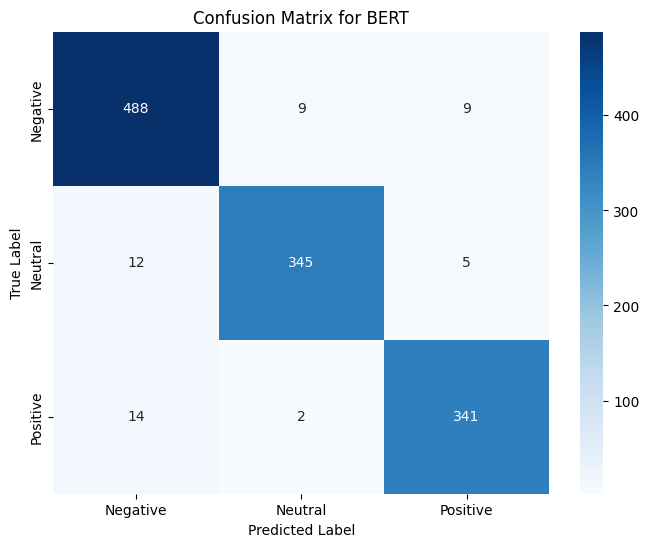

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Reshape y_test if needed
y_test = np.array(y_test).reshape(-1)

# Generate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_bert)

# Create a DataFrame from the confusion matrix
confusion_df = pd.DataFrame(confusion_mat, index=target_names, columns=target_names)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for BERT")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
df_train['LABEL_COLUMN'].value_counts()

In [ ]:
ros = RandomOverSampler()
train_x, train_y = ros.fit_resample(np.array(df_train['DATA_COLUMN']).reshape(-1, 1), np.array(df_train['LABEL_COLUMN']).reshape(-1, 1))
df_train_os = pd.DataFrame(list(zip([x[0] for x in train_x], train_y)), columns=['DATA_COLUMN', 'LABEL_COLUMN'])

In [ ]:
df_train_os['LABEL_COLUMN'].value_counts()

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
rus = RandomUnderSampler()
train_x, train_y = rus.fit_resample(np.array(df_train['DATA_COLUMN']).reshape(-1, 1), np.array(df_train['LABEL_COLUMN']).reshape(-1, 1))
df_train_us = pd.DataFrame(list(zip([x[0] for x in train_x], train_y)), columns=['DATA_COLUMN', 'LABEL_COLUMN'])

In [ ]:
df_train_us['LABEL_COLUMN'].value_counts()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# Step 1: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(df_train_os['DATA_COLUMN'], df_train_os['LABEL_COLUMN'], test_size=0.2, random_state=42)

In [ ]:
# Step 2: Apply ROS to the training set
ros = RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_resample(X_train.values.reshape(-1, 1), y_train.values)

In [ ]:
# Step 3: Preprocess and vectorize the text data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform([str(x[0]) for x in X_train_ros])
X_test_vec = vectorizer.transform([str(x) for x in X_test])

In [ ]:
# Step 4: Train a machine learning model (e.g., Logistic Regression)
model = LogisticRegression()
model.fit(X_train_vec, y_train_ros)

In [ ]:
# Step 5: Evaluate the model on the original testing data
y_pred = model.predict(X_test_vec)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

In [ ]:
# Step 6: Calculate and display the classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

In [ ]:
# Step 7: Generate and display the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
import numpy as np

# Step 1: Import the necessary libraries

# Step 2: Define the number of folds for cross-validation
num_folds = 5

# Step 3: Split the data into input features (X) and target variable (y)
X = df_train['DATA_COLUMN']
y = df_train['LABEL_COLUMN']

# Step 4: Initialize the k-fold cross-validation object
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)




In [ ]:
# Initialize lists to store evaluation metrics
classification_reports = []
confusion_matrices = []

# Step 5: Perform k-fold cross-validation
for train_index, test_index in kfold.split(X, y):
    # Split the data into training and testing sets for the current fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Preprocess and vectorize the text data
    vectorizer = CountVectorizer()
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    # Scale the input features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_vec.toarray())
    X_test_scaled = scaler.transform(X_test_vec.toarray())

In [ ]:
 # Train a machine learning model (e.g., Logistic Regression)
model = LogisticRegression(max_iter=1000, solver='liblinear')
model.fit(X_train_scaled, y_train)

  # Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [ ]:
 # Generate the classification report and confusion matrix
classification_reports.append(classification_report(y_test, y_pred))
confusion_matrices.append(confusion_matrix(y_test, y_pred))

# Print the classification report and confusion matrix for each fold
for fold, (classification_report, confusion_matrix) in enumerate(zip(classification_reports, confusion_matrices), start=1):
    print(f"Fold {fold}")
    print("Classification Report:")
    print(classification_report)
    print("Confusion Matrix:")
    print(confusion_matrix)
    print()

In [ ]:
# Calculate the average scores across all folds
average_accuracy = np.mean(accuracy_scores)
average_precision = np.mean(precision_scores)
average_recall = np.mean(recall_scores)
average_f1 = np.mean(f1_scores)

# Print the average scores
print("Average Accuracy:", average_accuracy)
print("Average Precision:", average_precision)
print("Average Recall:", average_recall)
print("Average F1-score:", average_f1)

In [ ]:
# Create a heatmap of the confusion matrix
cm = confusion_matrix
labels = np.unique(y)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Perform label encoding on the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_train['LABEL_COLUMN'])

# Perform one-hot encoding on the feature columns
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
X = one_hot_encoder.fit_transform(df_train[['DATA_COLUMN']])

# Create a 10-fold cross-validation iterator
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store classification reports and confusion matrices
classification_reports = []
confusion_matrices = []

combined_true_labels = []
combined_pred_labels = []

for fold, (train_index, test_index) in enumerate(kf.split(X, y), start=1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train a machine learning model (e.g., Logistic Regression)
    model = LogisticRegression(max_iter=1000, solver='liblinear')
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Accumulate true and predicted labels from each fold
    combined_true_labels.extend(y_test)
    combined_pred_labels.extend(y_pred)

    # Generate the classification report and confusion matrix
    classification_reports.append(classification_report(y_test, y_pred))
    confusion_matrices.append(confusion_matrix(y_test, y_pred))

    # Print the classification report and confusion matrix for each fold
    print(f"Fold {fold}")
    print("Classification Report:")
    print(classification_reports[-1])
    print("Confusion Matrix:")
    print(confusion_matrices[-1])
    print()

# Compute combined metrics
combined_accuracy = accuracy_score(combined_true_labels, combined_pred_labels)
combined_precision = precision_score(combined_true_labels, combined_pred_labels, average='macro')
combined_recall = recall_score(combined_true_labels, combined_pred_labels, average='macro')
combined_f1 = f1_score(combined_true_labels, combined_pred_labels, average='macro')

# Print combined metrics
print("Combined Metrics:")
print("Accuracy:", combined_accuracy)
print("Precision:", combined_precision)
print("Recall:", combined_recall)
print("F1 Score:", combined_f1)

# Compute the combined confusion matrix
combined_confusion_matrix = confusion_matrix(combined_true_labels, combined_pred_labels)

# Print the combined confusion matrix
print("Combined Confusion Matrix:")
print(combined_confusion_matrix)

# Create a heatmap of the combined confusion matrix
labels = np.unique(y)
sns.heatmap(combined_confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Combined Confusion Matrix")
plt.show()
